<h2 style="color:red" align="center">Linear Regression</h2>

<h3 style="color:green">Sample problem of predicting home price Patia Bhubaneswar</h3>
99 Acers data (https://www.99acres.com/property-rates-and-price-trends-in-patia-bhubaneswar-prffid?preference=RESALE#price_trends)

Below table represents sqft land prices in patia bbsr

<img src="homepricetable.JPG" style="width:370px;height:250px">

**Problem Statement**: Given above data build a machine learning model that can predict prices based on square feet area for a given year


You can represent values in above table as a scatter plot (values are shown in red markers). After that one can draw a straight line that best fits values on chart. 

<img src="scatterplot.JPG" style="width:600px;height:370px">

You might remember about linear equation from your high school days math class. Home prices can be presented as following equation,

home price = m * (area) + b

Generic form of same equation is,

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('patia_house_prices.csv')
df

,Year,Price_per_sqft
0,2011,2700
1,2012,2900
2,2013,3100
3,2014,3300
4,2015,3500
5,2016,3700
6,2017,4000
7,2018,4300
8,2019,4600
9,2020,5000


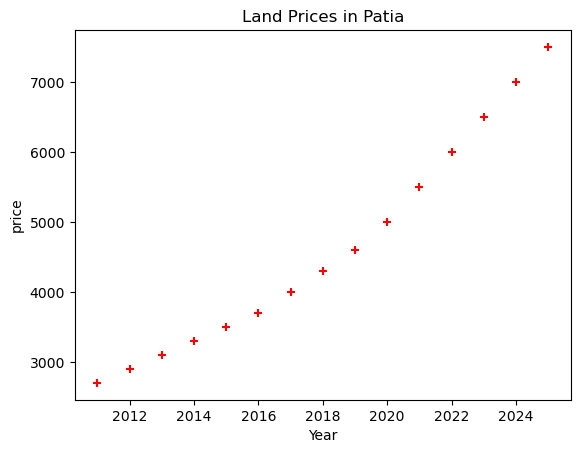

In [5]:
plt.title('Land Prices in Patia')
plt.xlabel('Year')
plt.ylabel('price')
plt.scatter(df.Year,df.Price_per_sqft,color='red',marker='+')

In [8]:
year_df = df.drop('Price_per_sqft',axis='columns')
year_df

,Year
0,2011
1,2012
2,2013
3,2014
4,2015
5,2016
6,2017
7,2018
8,2019
9,2020


In [9]:
price_df = df.Price_per_sqft
price_df

0     2700
1     2900
2     3100
3     3300
4     3500
5     3700
6     4000
7     4300
8     4600
9     5000
10    5500
11    6000
12    6500
13    7000
14    7500
Name: Price_per_sqft, dtype: int64

In [10]:
year_df = year_df.to_numpy()

In [11]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(year_df,price_df)

LinearRegression()

In [15]:
#reg.predict([[2026]])
pr = reg.predict([[2050]])
print(pr)



[15520.]


In [16]:
import pickle
filename = 'patia_house_modelv2.sav'
pickle.dump(reg, open(filename, 'wb'))

In [17]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict([[2023]])

In [18]:
print(result)

[6340.]


CSV file input and output

In [ ]:
area_df = pd.read_csv("areas.csv")
area_df.head(3)

In [ ]:
p = reg.predict(area_df)
p

In [ ]:
area_df['prices']=p
area_df

In [ ]:
area_df.to_csv("prediction.csv")

#API TEST IN POST METHODS


In [19]:
import requests
url = 'http://127.0.0.1:5000/predict'
data = {'year': 2025}
response = requests.post(url, data=data)
print(response.text)

<!DOCTYPE html>
<html>
<head>
    <title>Prediction Result</title>
</head>
<body>
    <h2>Predicted Price for Year 2025: $6690.0</h2>
    <br>
    <a href="/">Go Back</a>
</body>
</html>


<h3>Task</h3>

Make Linear Regression model for 5 diffrent area of bhubaneswar for last 10 Year and save the model. Then make a webapp/site with 5 button for selecting area.
Add another input field which take year and area size as input and predict the price for that year and area size SQFT.